# data science part 2 finale project

Yehudit Brickner

In this project we need to take the results from last semesters project of classification and try to get better results.
<br>
my best result from last semester with out getting rid of rows was 0.8675 pecent correct.
<br>
I will try to get better results this time using different models we learned this semester.
<br>
Because last semester I didnt divide my data and then normalize it, I will be doing that this semester.

In [1]:
# basic imports that i will need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#imprting the data

df0=pd.read_csv(r'C:\Users\nechd\Desktop\StudentsPerformance.csv')
df0.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# taking the features with numeric values and dividing by 100, so that they are between 0 and 1.

df0['math score']=df0['math score'].div(100)
df0['reading score']=df0['reading score'].div(100)
df0['writing score']=df0['writing score'].div(100)
df0.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.72,0.72,0.74
1,female,group C,some college,standard,completed,0.69,0.90,0.88
2,female,group B,master's degree,standard,none,0.90,0.95,0.93
3,male,group A,associate's degree,free/reduced,none,0.47,0.57,0.44
4,male,group C,some college,standard,none,0.76,0.78,0.75


In [4]:
# adding a column averge score, taking all grades adding them together and dividing by 3.

avg_scores = df0.loc[: , "math score":"writing score"]
df0['avg_scores']=avg_scores.mean(axis=1)
df0.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_scores
0,female,group B,bachelor's degree,standard,none,0.72,0.72,0.74,0.726667
1,female,group C,some college,standard,completed,0.69,0.90,0.88,0.823333
2,female,group B,master's degree,standard,none,0.90,0.95,0.93,0.926667
3,male,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,0.493333
4,male,group C,some college,standard,none,0.76,0.78,0.75,0.763333


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [6]:
#dividing the data frame into train, test

train_set, test_set = train_test_split(df0, test_size=0.2, random_state=42)

In [7]:
# I want to  to scale the data, so to do that i will cange all catagory.subcatagory to the average of that catagory.subcatagory, values from the avg column then diivde by 100.

# scaling the data for the training set

A=train_set.loc[train_set['race/ethnicity']=='group A']
print("A",A["avg_scores"].mean())
B=train_set.loc[train_set['race/ethnicity']=='group B']
print("B",B["avg_scores"].mean())
C=train_set.loc[train_set['race/ethnicity']=='group C']
print("C",C["avg_scores"].mean())
D=train_set.loc[train_set['race/ethnicity']=='group D']
print("D",D["avg_scores"].mean())
E=train_set.loc[train_set['race/ethnicity']=='group E']
print("E",E["avg_scores"].mean())

print()

S=train_set.loc[train_set['lunch']=='standard']
print("S",S["avg_scores"].mean())
FR=train_set.loc[train_set['lunch']=='free/reduced']
print("FR",FR["avg_scores"].mean())

print()

SHS=train_set.loc[train_set['parental level of education']=='some high school']
print("SHS",SHS["avg_scores"].mean())
HS=train_set.loc[train_set['parental level of education']=='high school']
print("HS",HS["avg_scores"].mean())
SCO=train_set.loc[train_set['parental level of education']=='some college']
print("SCO",SCO["avg_scores"].mean())
BA=train_set.loc[train_set['parental level of education']=="bachelor's degree"]
print("BA",BA["avg_scores"].mean())
M=train_set.loc[train_set['parental level of education']=="master's degree"]
print("M",M["avg_scores"].mean())
AS=train_set.loc[train_set['parental level of education']=="associate's degree"]
print("AS",AS["avg_scores"].mean())

print()

N=train_set.loc[train_set['test preparation course']=="none"]
print("N",N["avg_scores"].mean())
CO=train_set.loc[train_set['test preparation course']=="completed"]
print("CO",CO["avg_scores"].mean())

A 0.6470048309178743
B 0.6539433551198257
C 0.6747692307692305
D 0.6936798679867988
E 0.733563218390805

S 0.7128680688336523
FR 0.6228279181708781

SHS 0.6599270072992705
HS 0.6355974842767297
SCO 0.6865750915750919
BA 0.7298958333333331
M 0.7177304964539005
AS 0.6990130353817507

N 0.6535316698656425
CO 0.7342771804062125


In [8]:
# giving each catagory.subcatagory a new normalized value


train_set['gender'].values[train_set['gender'] == 'male'] = "1"
train_set['gender'].values[train_set['gender'] == 'female'] = "0"
train_set['lunch'].values[train_set['lunch'] == 'standard'] = "0.71"
train_set['lunch'].values[train_set['lunch'] == 'free/reduced'] = "0.62"
train_set['test preparation course'].values[train_set['test preparation course'] == 'none'] = "0.65"
train_set['test preparation course'].values[train_set['test preparation course'] == 'completed'] = "0.73"
train_set['parental level of education'].values[train_set['parental level of education'] == "bachelor's degree"] = "0.72"
train_set['parental level of education'].values[train_set['parental level of education'] == 'some college'] = "0.68"
train_set['parental level of education'].values[train_set['parental level of education'] == "associate's degree"] = "0.69"
train_set['parental level of education'].values[train_set['parental level of education'] == "master's degree"] = "0.71"
train_set['parental level of education'].values[train_set['parental level of education'] == 'high school'] = "0.63"
train_set['parental level of education'].values[train_set['parental level of education'] == 'some high school'] = "0.65"
train_set['race/ethnicity'].values[train_set['race/ethnicity'] == 'group A'] = "0.64"
train_set['race/ethnicity'].values[train_set['race/ethnicity'] == 'group B'] = "0.65"
train_set['race/ethnicity'].values[train_set['race/ethnicity'] == 'group C'] = "0.67"
train_set['race/ethnicity'].values[train_set['race/ethnicity'] == 'group D'] = "0.69"
train_set['race/ethnicity'].values[train_set['race/ethnicity'] == 'group E'] = "0.73"
train_set.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_scores
29,0,0.69,0.71,0.71,0.65,0.62,0.70,0.75,0.690000
535,0,0.67,0.72,0.62,0.73,0.66,0.83,0.83,0.773333
695,0,0.69,0.68,0.62,0.65,0.79,0.89,0.86,0.846667
557,1,0.67,0.71,0.62,0.65,0.61,0.67,0.66,0.646667
836,1,0.73,0.63,0.71,0.65,0.73,0.64,0.57,0.646667


In [9]:
# changing the data type of the columns we changed from object to floats, so that we can compare the data.

convert_dict = {'gender': float,
                'race/ethnicity':float,
                'parental level of education':float,
                'lunch':float,
                'test preparation course':float,
               } 

train_set = train_set.astype(convert_dict) 
print(train_set.dtypes) 
train_set.head()

gender                         float64
race/ethnicity                 float64
parental level of education    float64
lunch                          float64
test preparation course        float64
math score                     float64
reading score                  float64
writing score                  float64
avg_scores                     float64
dtype: object


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_scores
29,0.0,0.69,0.71,0.71,0.65,0.62,0.70,0.75,0.690000
535,0.0,0.67,0.72,0.62,0.73,0.66,0.83,0.83,0.773333
695,0.0,0.69,0.68,0.62,0.65,0.79,0.89,0.86,0.846667
557,1.0,0.67,0.71,0.62,0.65,0.61,0.67,0.66,0.646667
836,1.0,0.73,0.63,0.71,0.65,0.73,0.64,0.57,0.646667


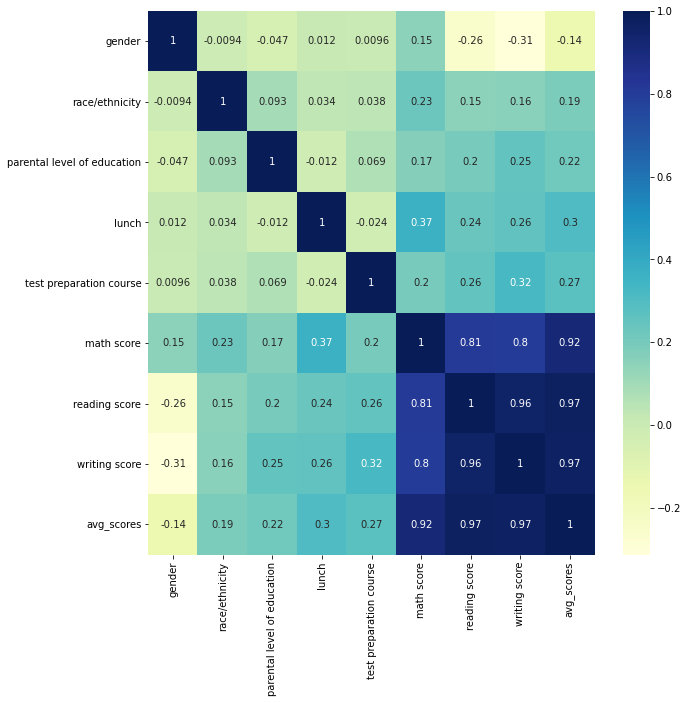

In [10]:
# corralation matrix

plt.figure(figsize=(10,10))
corrMatrix = train_set.corr()
sns.heatmap(corrMatrix,cmap="YlGnBu", annot=True)
plt.show()

In [11]:
# I want to  to scale the data, so to do that i will cange all catagory.subcatagory to the average of that catagory.subcatagory, values from the avg column then diivde by 100.

# scaling the data for the testing set

A1=test_set.loc[test_set['race/ethnicity']=='group A']
print("A",A1["avg_scores"].mean())
B1=test_set.loc[test_set['race/ethnicity']=='group B']
print("B",B1["avg_scores"].mean())
C1=test_set.loc[test_set['race/ethnicity']=='group C']
print("C",C1["avg_scores"].mean())
D1=test_set.loc[test_set['race/ethnicity']=='group D']
print("D",D1["avg_scores"].mean())
E1=test_set.loc[test_set['race/ethnicity']=='group E']
print("E",E1["avg_scores"].mean())

print()

S1=test_set.loc[test_set['lunch']=='standard']
print("S",S1["avg_scores"].mean())
FR1=test_set.loc[test_set['lunch']=='free/reduced']
print("FR",FR1["avg_scores"].mean())

print()

SHS1=test_set.loc[test_set['parental level of education']=='some high school']
print("SHS",SHS1["avg_scores"].mean())
HS1=test_set.loc[test_set['parental level of education']=='high school']
print("HS",HS1["avg_scores"].mean())
SCO1=test_set.loc[test_set['parental level of education']=='some college']
print("SCO",SCO1["avg_scores"].mean())
BA1=test_set.loc[test_set['parental level of education']=="bachelor's degree"]
print("BA",BA1["avg_scores"].mean())
M1=test_set.loc[test_set['parental level of education']=="master's degree"]
print("M",M1["avg_scores"].mean())
AS1=test_set.loc[test_set['parental level of education']=="associate's degree"]
print("AS",AS1["avg_scores"].mean())

print()

N1=test_set.loc[test_set['test preparation course']=="none"]
print("N",N1["avg_scores"].mean())
CO1=test_set.loc[test_set['test preparation course']=="completed"]
print("CO",CO1["avg_scores"].mean())

A 0.571
B 0.6577477477477477
C 0.6561016949152545
D 0.6854444444444446
E 0.6983333333333333

S 0.6890983606557376
FR 0.619017094017094

SHS 0.6222222222222223
HS 0.6110810810810812
SCO 0.6772727272727272
BA 0.6727272727272728
M 0.8075
AS 0.6818604651162791

N 0.6368595041322315
CO 0.6999156118143459


In [12]:
# giving each catagory.subcatagory a new normalized value

test_set['gender'].values[test_set['gender'] == 'male'] = "1"
test_set['gender'].values[test_set['gender'] == 'female'] = "0"
test_set['lunch'].values[test_set['lunch'] == 'standard'] = "0.68"
test_set['lunch'].values[test_set['lunch'] == 'free/reduced'] = "0.61"
test_set['test preparation course'].values[test_set['test preparation course'] == 'none'] = "0.63"
test_set['test preparation course'].values[test_set['test preparation course'] == 'completed'] = "0.69"
test_set['parental level of education'].values[test_set['parental level of education'] == "bachelor's degree"] = "0.67"
test_set['parental level of education'].values[test_set['parental level of education'] == 'some college'] = "0.67"
test_set['parental level of education'].values[test_set['parental level of education'] == "associate's degree"] = "0.68"
test_set['parental level of education'].values[test_set['parental level of education'] == "master's degree"] = "0.80"
test_set['parental level of education'].values[test_set['parental level of education'] == 'high school'] = "0.61"
test_set['parental level of education'].values[test_set['parental level of education'] == 'some high school'] = "0.62"
test_set['race/ethnicity'].values[test_set['race/ethnicity'] == 'group A'] = "0.57"
test_set['race/ethnicity'].values[test_set['race/ethnicity'] == 'group B'] = "0.65"
test_set['race/ethnicity'].values[test_set['race/ethnicity'] == 'group C'] = "0.65"
test_set['race/ethnicity'].values[test_set['race/ethnicity'] == 'group D'] = "0.68"
test_set['race/ethnicity'].values[test_set['race/ethnicity'] == 'group E'] = "0.69"
test_set.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_scores
521,0,0.65,0.68,0.68,0.63,0.91,0.86,0.84,0.870000
737,0,0.65,0.67,0.61,0.69,0.53,0.66,0.73,0.640000
740,1,0.68,0.67,0.68,0.63,0.80,0.73,0.72,0.750000
660,1,0.65,0.67,0.61,0.63,0.74,0.77,0.73,0.746667
411,1,0.69,0.67,0.68,0.69,0.84,0.83,0.78,0.816667


In [13]:
# changing the data type of the columns we changed from object to floats, so that we can compare the data.

convert_dict = {'gender': float,
                'race/ethnicity':float,
                'parental level of education':float,
                'lunch':float,
                'test preparation course':float,
               } 

test_set = test_set.astype(convert_dict) 
print(test_set.dtypes) 
test_set.head()

gender                         float64
race/ethnicity                 float64
parental level of education    float64
lunch                          float64
test preparation course        float64
math score                     float64
reading score                  float64
writing score                  float64
avg_scores                     float64
dtype: object


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_scores
521,0.0,0.65,0.68,0.68,0.63,0.91,0.86,0.84,0.870000
737,0.0,0.65,0.67,0.61,0.69,0.53,0.66,0.73,0.640000
740,1.0,0.68,0.67,0.68,0.63,0.80,0.73,0.72,0.750000
660,1.0,0.65,0.67,0.61,0.63,0.74,0.77,0.73,0.746667
411,1.0,0.69,0.67,0.68,0.69,0.84,0.83,0.78,0.816667


In [14]:
# dividng the train and test into x,y

X_Train_set1=train_set.loc[:, train_set.columns[1:8]]
Y_Train_set1=train_set.loc[:, train_set.columns[0]]
X_test_set1=test_set.loc[:, test_set.columns[1:8]]
Y_test_set1=test_set.loc[:, test_set.columns[0]]

In [15]:
# more imports that i will need

from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [16]:
# function to represent the confusion matrix nicely

def confussion_matrix (cf_matrix):
    group_names = ['true pos', 'false pos', 'false neg', 'true neg']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    

# adaboost 1

In [17]:
count_ada=0
b=np.arange(0.1, 1.1, 0.1)
for a in range (50,150):
    for x in b:
        ada = AdaBoostClassifier(random_state=42, n_estimators=a,learning_rate=x)
        ada.fit(X_Train_set1, Y_Train_set1)
        y_pred_ada = ada.predict(X_test_set1)
        a_ada=metrics.accuracy_score(Y_test_set1, y_pred_ada)
        if a_ada>count_ada:
            count_ada=a_ada
            print(a,x, count_ada)

50 0.1 0.78
50 0.2 0.8
50 0.30000000000000004 0.845
50 0.4 0.855
50 0.9 0.86
50 1.0 0.875
74 0.6 0.885


In [18]:
# the best value for adaboost is with 74 estimators and 0.855 secsess

In [19]:
ada1 = AdaBoostClassifier(random_state=42, n_estimators=74,learning_rate=0.6)
ada1.fit(X_Train_set1, Y_Train_set1)
y_pred_ada1 = ada1.predict(X_test_set1)
accuracy_ada1=metrics.accuracy_score(Y_test_set1, y_pred_ada1)
accuracy_ada1

0.885

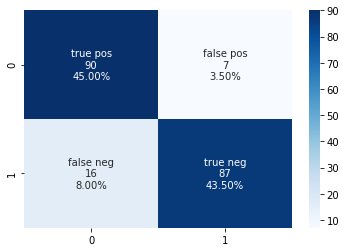

In [21]:
# confusion matrix
mat_ada1=confusion_matrix(Y_test_set1, y_pred_ada1)
confussion_matrix(mat_ada1)

In [22]:
# precision score, recall score, f1 score
print("precision_score_ada1:",precision_score(Y_test_set1, y_pred_ada1)) 
print("recall_score_ada1:",recall_score(Y_test_set1, y_pred_ada1))
print("f1_score_ada1:",f1_score(Y_test_set1, y_pred_ada1))

precision_score_ada1: 0.925531914893617
recall_score_ada1: 0.8446601941747572
f1_score_ada1: 0.883248730964467


In [23]:
# cross validation
cv_scores_ada1=cross_val_score(ada1, X_Train_set1, Y_Train_set1, cv=5, scoring="accuracy")
print(cv_scores_ada1, "mean:", np.mean(cv_scores_ada1))

[0.85625 0.875   0.875   0.85    0.8625 ] mean: 0.8637500000000001


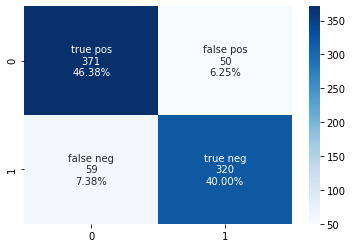

In [24]:
# confusion matrix
y_pred_ada1_c = cross_val_predict(ada1,  X_Train_set1, Y_Train_set1, cv=5)
cofussion_ada1=confusion_matrix(Y_Train_set1, y_pred_ada1_c)
confussion_matrix(cofussion_ada1)

In [25]:
# precision score, recall score, f1 score
print("precision_score_train:",precision_score(Y_Train_set1, y_pred_ada1_c)) 
print("recall_score_train:",recall_score(Y_Train_set1, y_pred_ada1_c))
print("f1_score_train:",f1_score(Y_Train_set1, y_pred_ada1_c))

precision_score_train: 0.8648648648648649
recall_score_train: 0.8443271767810027
f1_score_train: 0.8544726301735649


# gradient boosting 1

In [26]:
count_grb=0
b=np.arange(0.1, 1.1, 0.1)
for g in range(1,150):
    for x in b:
        grb=GradientBoostingClassifier(n_estimators=g, learning_rate=x,max_depth=1, random_state=42)
        grb.fit(X_Train_set1,Y_Train_set1)
        y_pred_grb = grb.predict(X_test_set1)
        a_grb=metrics.accuracy_score(Y_test_set1, y_pred_grb)
        if a_grb>count_grb:
            count_grb= a_grb 
            print(g, x, a_grb)   

1 0.1 0.485
1 0.2 0.63
3 0.6 0.645
4 0.4 0.675
5 0.30000000000000004 0.695
5 0.6 0.725
6 0.4 0.74
6 0.7000000000000001 0.76
7 0.5 0.78
9 0.9 0.785
10 0.5 0.79
11 0.5 0.795
11 0.7000000000000001 0.815
13 0.7000000000000001 0.825
13 0.8 0.84
13 0.9 0.845
14 0.7000000000000001 0.85
15 0.7000000000000001 0.855
24 0.9 0.86
25 0.6 0.865
28 0.5 0.87
38 1.0 0.875
46 0.8 0.89


In [27]:
# the best value for gradient boosting is with 46 estimators and a 0.8 learning rate. the secsees is 0.855.

In [29]:
grb1=GradientBoostingClassifier(n_estimators=146, learning_rate=0.8, max_depth=1, random_state=42)
grb1.fit(X_Train_set1,Y_Train_set1)
y_pred_grb1 = grb1.predict(X_test_set1)
accuracy_grb1=metrics.accuracy_score(Y_test_set1, y_pred_grb)
accuracy_grb1

0.855

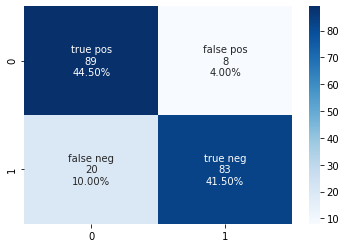

In [30]:
# confusion matrix
mat_grb1=confusion_matrix(Y_test_set1, y_pred_grb1)
confussion_matrix(mat_grb1)

In [31]:
# precision score, recall score, f1 score
print("precision_score_grb1:",precision_score(Y_test_set1, y_pred_grb1)) 
print("recall_score_grb1:",recall_score(Y_test_set1, y_pred_grb1))
print("f1_score_grb1:",f1_score(Y_test_set1, y_pred_grb1))

precision_score_grb1: 0.9120879120879121
recall_score_grb1: 0.8058252427184466
f1_score_grb1: 0.8556701030927835


In [32]:
# cross validation
cv_scores_grb1=cross_val_score(grb1, X_Train_set1, Y_Train_set1, cv=5, scoring="accuracy")
print(cv_scores_grb1, "mean:", np.mean(cv_scores_grb1))

[0.875   0.9     0.89375 0.8625  0.875  ] mean: 0.88125


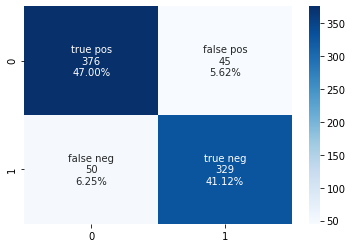

In [33]:
# confusion matrix
y_pred_grb1_c = cross_val_predict(grb1,  X_Train_set1, Y_Train_set1, cv=5)
cofussion_grb1=confusion_matrix(Y_Train_set1, y_pred_grb1_c)
confussion_matrix(cofussion_grb1)

In [34]:
# precision score, recall score, f1 score
print("precision_score_train:",precision_score(Y_Train_set1, y_pred_grb1_c)) 
print("recall_score_train:",recall_score(Y_Train_set1, y_pred_grb1_c))
print("f1_score_train:",f1_score(Y_Train_set1, y_pred_grb1_c))

precision_score_train: 0.8796791443850267
recall_score_train: 0.8680738786279684
f1_score_train: 0.8738379814077025


# XGBoost 1

In [35]:
xg_count=0
for x in range(50,150):
    xg=XGBClassifier(n_estimators=x, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
    xg.fit(X_Train_set1, Y_Train_set1)
    y_pred_xg = xg.predict(X_test_set1)
    a_xg=metrics.accuracy_score(Y_test_set1, y_pred_xg)
    if a_xg>xg_count:
        xg_count=a_xg
        print(x, a_xg)

50 0.87
61 0.89
73 0.9
89 0.905
92 0.91
93 0.915
105 0.92
146 0.925
148 0.93


In [36]:
# the best value for XGboost is with 148 estimators and the secsees is 0.93.

In [37]:
xg1=XGBClassifier(n_estimators=148, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
xg1.fit(X_Train_set1, Y_Train_set1)
y_pred_xg1 = xg1.predict(X_test_set1)
acurracy_xg=metrics.accuracy_score(Y_test_set1, y_pred_xg1)
acurracy_xg

0.93

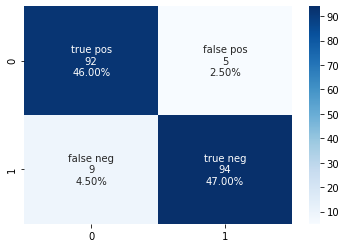

In [38]:
# confusion matrix
mat_xg1=confusion_matrix(Y_test_set1, y_pred_xg1)
confussion_matrix(mat_xg1)

In [39]:
print("precision_score_xg1:",precision_score(Y_test_set1, y_pred_xg1)) 
print("recall_score_xg1:",recall_score(Y_test_set1, y_pred_xg1))
print("f1_score_xg1:",f1_score(Y_test_set1, y_pred_xg1))

precision_score_xg1: 0.9494949494949495
recall_score_xg1: 0.912621359223301
f1_score_xg1: 0.9306930693069307


In [40]:
# cross validation
cv_scores_xg1=cross_val_score(xg1, X_Train_set1, Y_Train_set1, cv=5, scoring="accuracy")
print(cv_scores_xg1, "mean:", np.mean(cv_scores_xg1))

[0.8875  0.8875  0.88125 0.84375 0.86875] mean: 0.87375


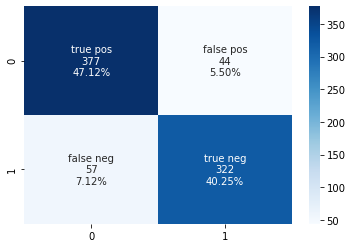

In [41]:
# confusion matrix
y_pred_xg1_c = cross_val_predict(xg1,  X_Train_set1, Y_Train_set1, cv=5)
cofussion_xg1=confusion_matrix(Y_Train_set1, y_pred_xg1_c)
confussion_matrix(cofussion_xg1)

In [42]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(Y_Train_set1, y_pred_xg1_c)) 
print("recall_score:",recall_score(Y_Train_set1, y_pred_xg1_c))
print("f1_score:",f1_score(Y_Train_set1, y_pred_xg1_c))

precision_score: 0.8797814207650273
recall_score: 0.8496042216358839
f1_score: 0.8644295302013422


# voting classifier 1

In [43]:
vote1=VotingClassifier(estimators=[('ada1', ada1),('gradient1', grb1),('xg1',xg1)], voting='soft',weights=[0.27,0.27,0.46])
vote1.fit(X_Train_set1, Y_Train_set1)
y_pred_vote1=vote1.predict(X_test_set1)
accuracy_vote1=metrics.accuracy_score(Y_test_set1, y_pred_vote1)
accuracy_vote1

0.895

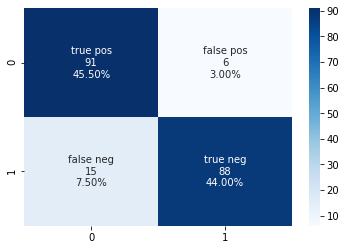

In [44]:
# confusion matrix
mat_vote1=confusion_matrix(Y_test_set1, y_pred_vote1)
confussion_matrix(mat_vote1)

In [45]:
# precision score, recall score, f1 score
print("precision_score_vote:",precision_score(Y_test_set1, y_pred_vote1)) 
print("recall_score_vote:",recall_score(Y_test_set1, y_pred_vote1))
print("f1_score_vote:",f1_score(Y_test_set1, y_pred_vote1))

precision_score_vote: 0.9361702127659575
recall_score_vote: 0.8543689320388349
f1_score_vote: 0.8934010152284263


In [46]:
# cross validation
cv_scores_vote1=cross_val_score(vote1, X_Train_set1, Y_Train_set1, cv=5, scoring="accuracy")
print(cv_scores_vote1, "mean:", np.mean(cv_scores_vote1))

[0.86875 0.8875  0.89375 0.85    0.8625 ] mean: 0.8725000000000002


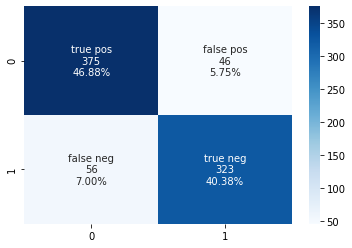

In [47]:
# confusion matrix
y_pred_vote1_c = cross_val_predict(vote1,  X_Train_set1, Y_Train_set1, cv=5)
cofussion_vote1=confusion_matrix(Y_Train_set1, y_pred_vote1_c)
confussion_matrix(cofussion_vote1)

In [48]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(Y_Train_set1, y_pred_vote1_c)) 
print("recall_score:",recall_score(Y_Train_set1, y_pred_vote1_c))
print("f1_score:",f1_score(Y_Train_set1, y_pred_vote1_c))

precision_score: 0.8753387533875339
recall_score: 0.8522427440633246
f1_score: 0.8636363636363636


# the best success using all the columns is 0.93 using XGboost

In [49]:
# trying to get better resullts only using the columns with the scores

X_Train_set2=train_set.loc[:, train_set.columns[5:8]]
Y_Train_set2=train_set.loc[:, train_set.columns[0]]
X_test_set2=test_set.loc[:, test_set.columns[5:8]]
Y_test_set2=test_set.loc[:, test_set.columns[0]]

In [50]:
X_Train_set2.head()

,math score,reading score,writing score
29,0.62,0.70,0.75
535,0.66,0.83,0.83
695,0.79,0.89,0.86
557,0.61,0.67,0.66
836,0.73,0.64,0.57


# adaboost 2

In [51]:
count_ada2=0
b=np.arange(0.1, 1.1, 0.1)
for a in range (50,150):
    for x in b:
        ada2 = AdaBoostClassifier(random_state=42, n_estimators=a, learning_rate=x)
        ada2.fit(X_Train_set2, Y_Train_set2)
        y_pred_ada2 = ada2.predict(X_test_set2)
        a_ada2=metrics.accuracy_score(Y_test_set2, y_pred_ada2)
        if a_ada2>count_ada2:
            count_ada2=a_ada2
            print(a,x,count_ada2)

50 0.1 0.78
50 0.2 0.8
50 0.30000000000000004 0.855
50 0.4 0.86
50 0.5 0.87
50 0.6 0.875
63 0.9 0.88
64 0.6 0.885
72 0.7000000000000001 0.89


In [52]:
# the best value for adaboost is with 72 estimators and 0.89 secsess

In [53]:
ada2 = AdaBoostClassifier(random_state=42, n_estimators=72, learning_rate=0.7)    
ada2.fit(X_Train_set2, Y_Train_set2)
y_pred_ada2 = ada2.predict(X_test_set2)
accuracy_ada2=metrics.accuracy_score(Y_test_set2, y_pred_ada2)
accuracy_ada2

0.89

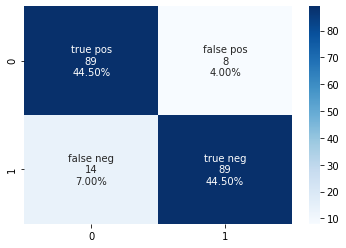

In [54]:
# # confusion matrix
mat_ada2=confusion_matrix(Y_test_set2, y_pred_ada2)
confussion_matrix(mat_ada2)

In [55]:
# precision score, recall score, f1 score
print("precision_score_ada2:",precision_score(Y_test_set2, y_pred_ada2)) 
print("recall_score_ada2:",recall_score(Y_test_set2, y_pred_ada2))
print("f1_score_ada2:",f1_score(Y_test_set2, y_pred_ada2))

precision_score_ada2: 0.9175257731958762
recall_score_ada2: 0.8640776699029126
f1_score_ada2: 0.89


In [56]:
# cross validation
cv_scores_ada2=cross_val_score(ada2, X_Train_set2, Y_Train_set2, cv=5, scoring="accuracy")
print(cv_scores_ada2, "mean:", np.mean(cv_scores_ada2))

[0.85625 0.825   0.825   0.8     0.8125 ] mean: 0.8237499999999999


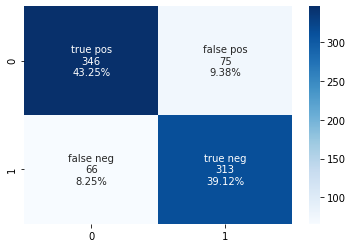

In [57]:
# confusion matrix
y_pred_ada2_c = cross_val_predict(ada2,  X_Train_set2, Y_Train_set2, cv=5)
cofussion_ada2=confusion_matrix(Y_Train_set2, y_pred_ada2_c)
confussion_matrix(cofussion_ada2)

In [58]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(Y_Train_set2, y_pred_ada2_c)) 
print("recall_score:",recall_score(Y_Train_set2, y_pred_ada2_c))
print("f1_score:",f1_score(Y_Train_set2, y_pred_ada2_c))

precision_score: 0.8067010309278351
recall_score: 0.8258575197889182
f1_score: 0.8161668839634941


# gradient boosting 2

In [59]:
count_grb2=0
b=np.arange(0.1, 1.1, 0.1)
for g in range(50,200):
    for x in b:
        grb2=GradientBoostingClassifier(n_estimators=g, learning_rate=x,max_depth=1, random_state=42)
        grb2.fit(X_Train_set2,Y_Train_set2)
        y_pred_grb2 = grb2.predict(X_test_set2)
        a_grb2=metrics.accuracy_score(Y_test_set2, y_pred_grb2)
        if a_grb2>count_grb2:
            count_grb2= a_grb2 
            print(g, x, a_grb2) 

50 0.1 0.78
50 0.2 0.835
50 0.30000000000000004 0.84
50 0.4 0.845
50 0.5 0.865
50 0.6 0.87
50 0.7000000000000001 0.875
50 1.0 0.88
69 1.0 0.885
89 0.9 0.89
159 0.6 0.895


In [60]:
# the best value for gradientboosting is with 159 estimators and a 0.6 learning rate. the secsees is 0.895.

In [61]:
grb2=GradientBoostingClassifier(n_estimators=159, learning_rate=0.6,max_depth=1, random_state=42)
grb2.fit(X_Train_set2,Y_Train_set2)
y_pred_grb2 = grb2.predict(X_test_set2)
accuracy_grb2=metrics.accuracy_score(Y_test_set2, y_pred_grb2)
accuracy_grb2

0.895

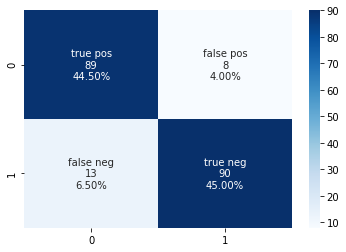

In [62]:
# confusion matrix
mat_grb2=confusion_matrix(Y_test_set2, y_pred_grb2)
confussion_matrix(mat_grb2)

In [63]:
# precision score, recall score, f1 score
print("precision_score_grb2:",precision_score(Y_test_set2, y_pred_grb2)) 
print("recall_score_grb2:",recall_score(Y_test_set2, y_pred_grb2))
print("f1_score_grb2:",f1_score(Y_test_set2, y_pred_grb2))

precision_score_grb2: 0.9183673469387755
recall_score_grb2: 0.8737864077669902
f1_score_grb2: 0.8955223880597014


In [64]:
# cross validation
cv_scores_grb2=cross_val_score(grb2, X_Train_set2, Y_Train_set2, cv=5, scoring="accuracy")
print(cv_scores_grb2, "mean:", np.mean(cv_scores_grb2))

[0.85    0.85    0.8375  0.78125 0.7875 ] mean: 0.82125


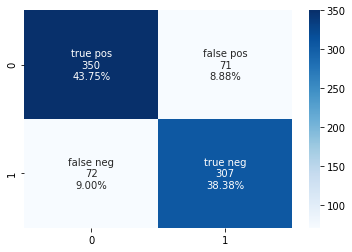

In [65]:
# confusion matrix
y_pred_grb2_c = cross_val_predict(grb2,  X_Train_set2, Y_Train_set2, cv=5)
cofussion_grb2=confusion_matrix(Y_Train_set1, y_pred_grb2_c)
confussion_matrix(cofussion_grb2)

In [66]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(Y_Train_set2, y_pred_grb2_c)) 
print("recall_score:",recall_score(Y_Train_set2, y_pred_grb2_c))
print("f1_score:",f1_score(Y_Train_set2, y_pred_grb2_c))

precision_score: 0.8121693121693122
recall_score: 0.8100263852242744
f1_score: 0.8110964332892999


# XGBoost 2

In [67]:
xg_count2=0
for x in range(50,200):
    xg2=XGBClassifier(n_estimators=x, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
    xg2.fit(X_Train_set2, Y_Train_set2)
    y_pred_xg2 = xg2.predict(X_test_set2)
    a_xg2=metrics.accuracy_score(Y_test_set2, y_pred_xg2)
    if a_xg2>xg_count2:
        xg_count2=a_xg2
        print(x, a_xg2)

50 0.83
51 0.835
52 0.84
53 0.845
55 0.85
56 0.86
57 0.865
73 0.87
80 0.875
84 0.88
93 0.885
94 0.89
99 0.895


In [68]:
# the best value for XGboost is with 99 estimators and the secsees is 0.895.

In [69]:
xg2=XGBClassifier(n_estimators=99, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
xg2.fit(X_Train_set2, Y_Train_set2)
y_pred_xg2 = xg2.predict(X_test_set2)
acurracy_xg2=metrics.accuracy_score(Y_test_set2, y_pred_xg2)
acurracy_xg2

0.895

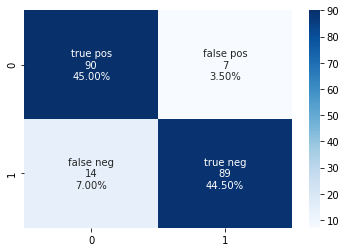

In [70]:
# confusion matrix
mat_xg2=confusion_matrix(Y_test_set2, y_pred_xg2)
confussion_matrix(mat_xg2)

In [71]:
# precision score, recalll score, f1 score
print("precision_score_xg2:",precision_score(Y_test_set2, y_pred_xg2)) 
print("recall_score_xg2:",recall_score(Y_test_set2, y_pred_xg2))
print("f1_score_xg2:",f1_score(Y_test_set2, y_pred_xg2))

precision_score_xg2: 0.9270833333333334
recall_score_xg2: 0.8640776699029126
f1_score_xg2: 0.8944723618090452


In [72]:
# cross validation
cv_scores_xg2=cross_val_score(xg2, X_Train_set2, Y_Train_set2, cv=5, scoring="accuracy")
print(cv_scores_xg2, "mean:", np.mean(cv_scores_xg2))

[0.8625  0.84375 0.825   0.80625 0.83125] mean: 0.83375


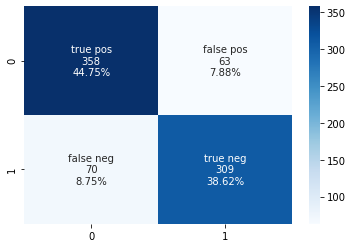

In [73]:
# confusion matrix
y_pred_xg2_c = cross_val_predict(xg2,  X_Train_set2, Y_Train_set2, cv=5)
cofussion_xg2=confusion_matrix(Y_Train_set2, y_pred_xg2_c)
confussion_matrix(cofussion_xg2)

In [74]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(Y_Train_set2, y_pred_xg2_c)) 
print("recall_score:",recall_score(Y_Train_set2, y_pred_xg2_c))
print("f1_score:",f1_score(Y_Train_set2, y_pred_xg2_c))

precision_score: 0.8306451612903226
recall_score: 0.8153034300791556
f1_score: 0.8229027962716379


# voting classifier 2

In [75]:
vote2=VotingClassifier(estimators=[('ada2', ada2),('gradient2', grb2),('xg2',xg2)], voting='hard')
vote2.fit(X_Train_set2, Y_Train_set2)
y_pred_vote2=vote2.predict(X_test_set2)
accuracy_vote2=metrics.accuracy_score(Y_test_set2, y_pred_vote2)
accuracy_vote2

0.895

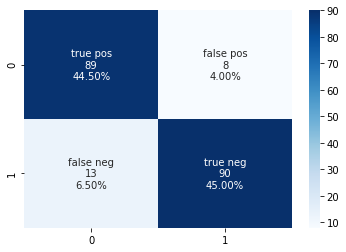

In [76]:
# confusion matrix
mat_vote2=confusion_matrix(Y_test_set2, y_pred_vote2)
confussion_matrix(mat_vote2)

In [77]:
# precision score, recall score, f1 score
print("precision_score_vote:",precision_score(Y_test_set2, y_pred_vote2)) 
print("recall_score_vote:",recall_score(Y_test_set2, y_pred_vote2))
print("f1_score_vote:",f1_score(Y_test_set2, y_pred_vote2))

precision_score_vote: 0.9183673469387755
recall_score_vote: 0.8737864077669902
f1_score_vote: 0.8955223880597014


In [78]:
# cross validation
cv_scores_vote2=cross_val_score(vote2, X_Train_set2, Y_Train_set2, cv=5, scoring="accuracy")
print(cv_scores_vote2, "mean:", np.mean(cv_scores_vote2))

[0.85625 0.8375  0.825   0.79375 0.80625] mean: 0.8237500000000001


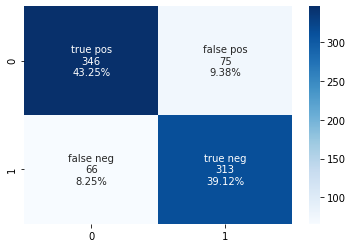

In [79]:
# confusion matrix
y_pred_vote2_c = cross_val_predict(vote2,  X_Train_set2, Y_Train_set2, cv=5)
cofussion_vote2=confusion_matrix(Y_Train_set2, y_pred_vote2_c)
confussion_matrix(cofussion_vote2)

In [80]:
# precision score, recalll score, f1 score
print("precision_score:",precision_score(Y_Train_set2, y_pred_vote2_c)) 
print("recall_score:",recall_score(Y_Train_set2, y_pred_vote2_c))
print("f1_score:",f1_score(Y_Train_set2, y_pred_vote2_c))

precision_score: 0.8067010309278351
recall_score: 0.8258575197889182
f1_score: 0.8161668839634941


# the best secsees using the columns with the scores is 0.895, with gradientboosting, XGboost, and voting classifier.

In [81]:
#adding a new column with the average of the columns that arent the scores in the train set

avg_train=train_set.loc[:, train_set.columns[1:5]]
train_set['other avg']=avg_train.mean(axis=1)
train_set.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_scores,other avg
29,0.0,0.69,0.71,0.71,0.65,0.62,0.70,0.75,0.690000,0.6900
535,0.0,0.67,0.72,0.62,0.73,0.66,0.83,0.83,0.773333,0.6850
695,0.0,0.69,0.68,0.62,0.65,0.79,0.89,0.86,0.846667,0.6600
557,1.0,0.67,0.71,0.62,0.65,0.61,0.67,0.66,0.646667,0.6625
836,1.0,0.73,0.63,0.71,0.65,0.73,0.64,0.57,0.646667,0.6800


In [82]:
#adding a new column with the average of the columns that arent the scores in the test set

avg_test=test_set.loc[:, test_set.columns[1:5]]
test_set['other avg']=avg_test.mean(axis=1)
test_set.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_scores,other avg
521,0.0,0.65,0.68,0.68,0.63,0.91,0.86,0.84,0.870000,0.6600
737,0.0,0.65,0.67,0.61,0.69,0.53,0.66,0.73,0.640000,0.6550
740,1.0,0.68,0.67,0.68,0.63,0.80,0.73,0.72,0.750000,0.6650
660,1.0,0.65,0.67,0.61,0.63,0.74,0.77,0.73,0.746667,0.6400
411,1.0,0.69,0.67,0.68,0.69,0.84,0.83,0.78,0.816667,0.6825


In [83]:
# making the data set be the scores and both the averages

X_Train_set3=train_set.loc[:, train_set.columns[5:10]]
Y_Train_set3=train_set.loc[:, train_set.columns[0]]
X_test_set3=test_set.loc[:, test_set.columns[5:10]]
Y_test_set3=test_set.loc[:, test_set.columns[0]]

In [84]:
X_Train_set3.head()

,math score,reading score,writing score,avg_scores,other avg
29,0.62,0.70,0.75,0.690000,0.6900
535,0.66,0.83,0.83,0.773333,0.6850
695,0.79,0.89,0.86,0.846667,0.6600
557,0.61,0.67,0.66,0.646667,0.6625
836,0.73,0.64,0.57,0.646667,0.6800


# adaboost 3

In [85]:
count_ada3=0
b=np.arange(0.1, 1.1, 0.1)
for a in range (50,150):
    for x in b:
        ada3 = AdaBoostClassifier(random_state=42, n_estimators=a,learning_rate=x)
        ada3.fit(X_Train_set3, Y_Train_set3)
        y_pred_ada3 = ada3.predict(X_test_set3)
        a_ada3=metrics.accuracy_score(Y_test_set3, y_pred_ada3)
        if a_ada3>count_ada3:
            count_ada3=a_ada3
            print(a, x, count_ada3)

50 0.1 0.78
50 0.2 0.8
50 0.30000000000000004 0.855
50 0.7000000000000001 0.875
50 0.9 0.88
115 0.6 0.885


In [86]:
# the best value for adaboost is with 115 estimators and 0.885 secsess

In [87]:
ada3 = AdaBoostClassifier(random_state=42, n_estimators=115,learning_rate=0.6)
ada3.fit(X_Train_set3, Y_Train_set3)
y_pred_ada3 = ada3.predict(X_test_set3)
accuracy_ada3=metrics.accuracy_score(Y_test_set3, y_pred_ada3)
accuracy_ada3

0.885

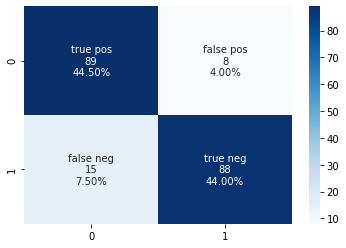

In [88]:
# confusion matrix
mat_ada3=confusion_matrix(Y_test_set3, y_pred_ada3)
confussion_matrix(mat_ada3)

In [89]:
# precision score, recall score, f1 score
print("precision_score_ada3:",precision_score(Y_test_set3, y_pred_ada3)) 
print("recall_score_ada3:",recall_score(Y_test_set3, y_pred_ada3))
print("f1_score_ada3:",f1_score(Y_test_set3, y_pred_ada3))

precision_score_ada3: 0.9166666666666666
recall_score_ada3: 0.8543689320388349
f1_score_ada3: 0.8844221105527638


In [90]:
# cross validation
cv_scores_ada3=cross_val_score(ada3, X_Train_set3, Y_Train_set3, cv=5, scoring="accuracy")
print(cv_scores_ada3, "mean:", np.mean(cv_scores_ada3))

[0.86875 0.8625  0.81875 0.80625 0.83125] mean: 0.8375


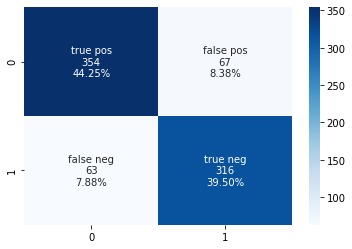

In [91]:
# confusion matrix
y_pred_ada_c3 = cross_val_predict(ada3,  X_Train_set3, Y_Train_set3, cv=5)
cofussion_ada3=confusion_matrix(Y_Train_set3, y_pred_ada_c3)
confussion_matrix(cofussion_ada3)

In [92]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(Y_Train_set3, y_pred_ada_c3)) 
print("recall_score:",recall_score(Y_Train_set3, y_pred_ada_c3))
print("f1_score:",f1_score(Y_Train_set3, y_pred_ada_c3))

precision_score: 0.825065274151436
recall_score: 0.8337730870712401
f1_score: 0.8293963254593176


# gradient boosting 3

In [93]:
count_grb3=0
b=np.arange(0.1, 1.1, 0.1)
for g in range(1,150):
    for x in b:
        grb3=GradientBoostingClassifier(n_estimators=g, learning_rate=x,max_depth=1, random_state=42)
        grb3.fit(X_Train_set3,Y_Train_set3)
        y_pred_grb3 = grb3.predict(X_test_set3)
        a_grb3=metrics.accuracy_score(Y_test_set3, y_pred_grb3)
        if a_grb3>count_grb3:
            count_grb3= a_grb3 
            print(g,x, a_grb3) 

1 0.1 0.485
1 0.2 0.63
3 0.6 0.645
4 0.4 0.675
5 0.30000000000000004 0.695
5 0.6 0.725
6 0.4 0.74
6 0.7000000000000001 0.76
7 0.5 0.78
9 0.9 0.785
10 0.5 0.79
11 0.5 0.795
11 0.7000000000000001 0.815
13 0.7000000000000001 0.825
13 0.8 0.84
13 0.9 0.845
14 0.7000000000000001 0.85
15 0.7000000000000001 0.855
15 0.8 0.865
21 0.7000000000000001 0.875
40 0.9 0.88
48 0.8 0.885
81 0.7000000000000001 0.89


In [94]:
# the best value for gradientboosting is with 81 estimators and a 0.7 learning rate. the secsees is 0.89.

In [95]:
grb3=GradientBoostingClassifier(n_estimators=81, learning_rate=0.7,max_depth=1, random_state=42)
grb3.fit(X_Train_set3,Y_Train_set3)
y_pred_grb3 = grb3.predict(X_test_set3)
accuracy_grb3=metrics.accuracy_score(Y_test_set3, y_pred_grb3)
accuracy_grb3

0.89

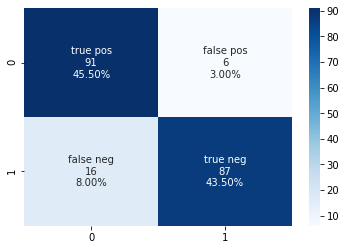

In [96]:
# confusion matrix
mat_grb3=confusion_matrix(Y_test_set3, y_pred_grb3)
confussion_matrix(mat_grb3)

In [97]:
# precision score, recall score, f1 score
print("precision_score_grb3:",precision_score(Y_test_set3, y_pred_grb3)) 
print("recall_score_grb3:",recall_score(Y_test_set3, y_pred_grb3))
print("f1_score_grb3:",f1_score(Y_test_set3, y_pred_grb3))

precision_score_grb3: 0.9354838709677419
recall_score_grb3: 0.8446601941747572
f1_score_grb3: 0.8877551020408163


In [98]:
# cross validation
cv_scores_grb3=cross_val_score(grb3, X_Train_set3, Y_Train_set3, cv=5, scoring="accuracy")
print(cv_scores_grb3, "mean:", np.mean(cv_scores_grb3))

[0.85625 0.85    0.81875 0.78125 0.83125] mean: 0.8275


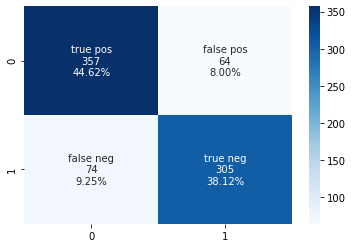

In [99]:
# confusion matrix
y_pred_grb3_c = cross_val_predict(grb3,  X_Train_set3, Y_Train_set3, cv=5)
cofussion_grb3=confusion_matrix(Y_Train_set3, y_pred_grb3_c)
confussion_matrix(cofussion_grb3)

In [100]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(Y_Train_set3, y_pred_grb3_c)) 
print("recall_score:",recall_score(Y_Train_set3, y_pred_grb3_c))
print("f1_score:",f1_score(Y_Train_set3, y_pred_grb3_c))

precision_score: 0.8265582655826558
recall_score: 0.8047493403693932
f1_score: 0.8155080213903743


# XGBoost 3

In [101]:
xg_count3=0
for x in range (50,200):
    xg3=XGBClassifier(n_estimators=x, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
    xg3.fit(X_Train_set3, Y_Train_set3)
    y_pred_xg3 = xg3.predict(X_test_set3)
    a_xg3=metrics.accuracy_score(Y_test_set3, y_pred_xg3)
    if a_xg3>xg_count3:
        xg_count3=a_xg3
        print(x, a_xg3)

50 0.855
54 0.865
55 0.87
76 0.88


In [102]:
# the best value for XGboost is with 76 estimators and the secsees is 0.88.

In [103]:
xg3=XGBClassifier(n_estimators=76, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")    
xg3.fit(X_Train_set3, Y_Train_set3)
y_pred_xg3 = xg3.predict(X_test_set3)
acurracy_xg3=metrics.accuracy_score(Y_test_set3, y_pred_xg3)
acurracy_xg3

0.88

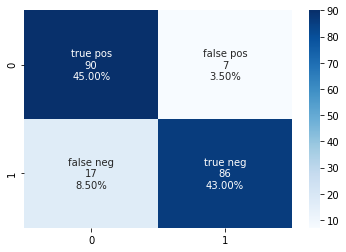

In [104]:
# confusion matrix
mat_xg3=confusion_matrix(Y_test_set3, y_pred_xg3)
confussion_matrix(mat_xg3)

In [105]:
# precision score, recall score, f1 score
print("precision_score_xg3:",precision_score(Y_test_set3, y_pred_xg3)) 
print("recall_score_xg3:",recall_score(Y_test_set3, y_pred_xg3))
print("f1_score_xg3:",f1_score(Y_test_set3, y_pred_xg3))

precision_score_xg3: 0.9247311827956989
recall_score_xg3: 0.8349514563106796
f1_score_xg3: 0.8775510204081631


In [106]:
# cross validation
cv_scores_xg3=cross_val_score(xg3, X_Train_set3, Y_Train_set3, cv=5, scoring="accuracy")
print(cv_scores_xg3, "mean:", np.mean(cv_scores_xg3))

[0.8375  0.85625 0.825   0.80625 0.8375 ] mean: 0.8324999999999999


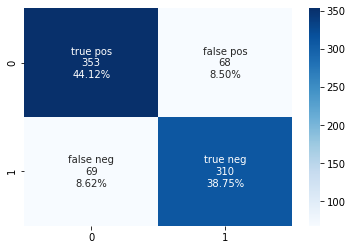

In [107]:
# confusion matrix
y_pred_xg3_c = cross_val_predict(xg3,  X_Train_set2, Y_Train_set2, cv=5)
cofussion_xg3=confusion_matrix(Y_Train_set3, y_pred_xg3_c)
confussion_matrix(cofussion_xg3)

In [108]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(Y_Train_set3, y_pred_xg3_c)) 
print("recall_score:",recall_score(Y_Train_set3, y_pred_xg3_c))
print("f1_score:",f1_score(Y_Train_set3, y_pred_xg3_c))

precision_score: 0.8201058201058201
recall_score: 0.8179419525065963
f1_score: 0.8190224570673711


# voting classifier 3

In [109]:
vote3=VotingClassifier(estimators=[('ada', ada3),('gradient', grb3),('xg',xg3)], voting='hard')
vote3.fit(X_Train_set3, Y_Train_set3)
y_pred_vote3=vote3.predict(X_test_set3)
accuracy_vote3=metrics.accuracy_score(Y_test_set3, y_pred_vote3)
accuracy_vote3

0.89

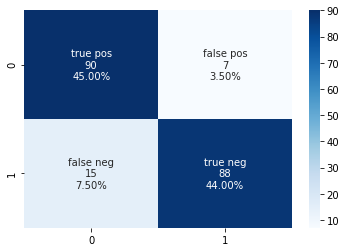

In [110]:
# confusion matrix
mat_vote3=confusion_matrix(Y_test_set3, y_pred_vote3)
confussion_matrix(mat_vote3)

In [111]:
# precision score, recall score, f1 score
print("precision_score_vote:",precision_score(Y_test_set3, y_pred_vote3)) 
print("recall_score_vote:",recall_score(Y_test_set3, y_pred_vote3))
print("f1_score_vote:",f1_score(Y_test_set3, y_pred_vote3))

precision_score_vote: 0.9263157894736842
recall_score_vote: 0.8543689320388349
f1_score_vote: 0.888888888888889


In [112]:
# cross validation
cv_scores_vote3=cross_val_score(vote3, X_Train_set3, Y_Train_set3, cv=5, scoring="accuracy")
print(cv_scores_vote3, "mean:", np.mean(cv_scores_vote3))

[0.85625 0.8625  0.81875 0.79375 0.83125] mean: 0.8324999999999999


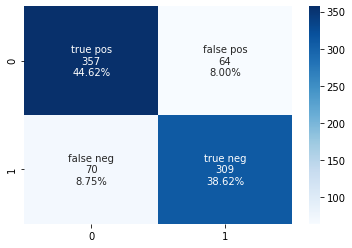

In [113]:
# confusion matrix
y_pred_vote3_c = cross_val_predict(vote3,  X_Train_set3, Y_Train_set3, cv=5)
cofussion_vote3=confusion_matrix(Y_Train_set3, y_pred_vote3_c)
confussion_matrix(cofussion_vote3)

In [114]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(Y_Train_set3, y_pred_vote3_c)) 
print("recall_score:",recall_score(Y_Train_set3, y_pred_vote3_c))
print("f1_score:",f1_score(Y_Train_set3, y_pred_vote3_c))

precision_score: 0.8284182305630027
recall_score: 0.8153034300791556
f1_score: 0.8218085106382979


### conclusion

In [118]:
print("cv_scores_ada1",cv_scores_ada1, "mean:", np.mean(cv_scores_ada1))
print("cv_scores_ada2",cv_scores_ada2, "mean:", np.mean(cv_scores_ada2))
print("cv_scores_ada3",cv_scores_ada3, "mean:", np.mean(cv_scores_ada3))
print("cv_scores_grb1",cv_scores_grb1, "mean:", np.mean(cv_scores_grb1))
print("cv_scores_grb2",cv_scores_grb2, "mean:", np.mean(cv_scores_grb2))
print("cv_scores_grb3",cv_scores_grb3, "mean:", np.mean(cv_scores_grb3))
print("cv_scores_xg1",cv_scores_xg1, "mean:", np.mean(cv_scores_xg1))
print("cv_scores_xg2",cv_scores_xg2, "mean:", np.mean(cv_scores_xg2))
print("cv_scores_xg3",cv_scores_xg3, "mean:", np.mean(cv_scores_xg3))
print("cv_scores_vote1",cv_scores_vote1,"mean",np.mean(cv_scores_vote1))
print("cv_scores_vote2",cv_scores_vote2,"mean",np.mean(cv_scores_vote2))
print("cv_scores_vote3",cv_scores_vote3,"mean",np.mean(cv_scores_vote3))

cv_scores_ada1 [0.85625 0.875   0.875   0.85    0.8625 ] mean: 0.8637500000000001
cv_scores_ada2 [0.85625 0.825   0.825   0.8     0.8125 ] mean: 0.8237499999999999
cv_scores_ada3 [0.86875 0.8625  0.81875 0.80625 0.83125] mean: 0.8375
cv_scores_grb1 [0.875   0.9     0.89375 0.8625  0.875  ] mean: 0.88125
cv_scores_grb2 [0.85    0.85    0.8375  0.78125 0.7875 ] mean: 0.82125
cv_scores_grb3 [0.85625 0.85    0.81875 0.78125 0.83125] mean: 0.8275
cv_scores_xg1 [0.8875  0.8875  0.88125 0.84375 0.86875] mean: 0.87375
cv_scores_xg2 [0.8625  0.84375 0.825   0.80625 0.83125] mean: 0.83375
cv_scores_xg3 [0.8375  0.85625 0.825   0.80625 0.8375 ] mean: 0.8324999999999999
cv_scores_vote1 [0.86875 0.8875  0.89375 0.85    0.8625 ] mean 0.8725000000000002
cv_scores_vote2 [0.85625 0.8375  0.825   0.79375 0.80625] mean 0.8237500000000001
cv_scores_vote3 [0.85625 0.8625  0.81875 0.79375 0.83125] mean 0.8324999999999999


# The best result after cross validating is 88.125% using Gradiant Boosting with all of the columns.
<br> last semester my best result was 89.3% using all the columns and rows within 2 std of the norm with the QDA model,
<br> this time I didnt decrease the rows because i wanted to secseed in predicting those people well.
<br> also last semester I had information leakedge between the train and test sets because i normalizrd all the data together before I split it.
<br> if we compare to last semesters result using all rows and all or some of the columns my best result was 86.75% with only the columns of the grades.
<br> so if I compare my best model in this notebook to the one I mentioned above I was able to get almost 1.5% better .